# ECS529U Algorithms and Data Structures
# Lab sheet 6

This lab gets you to work with linked lists.

**Marks (max 5):**  Questions 1-3: 1 each  |  Questions 4-5: 0.5 each  |  Question 6: 1

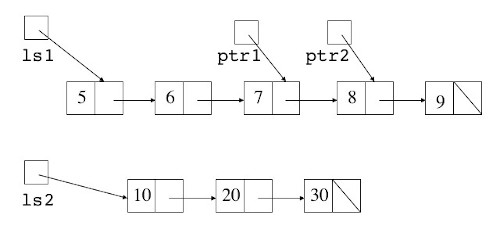## Question 1

You are asked to solve the following pointer game. Start with this initial configuration:

![pointers](pointerz.jpg)
    
Perform the following groups of operations and draw the new final lists in each case. Each 
time, start from the initial configuration above.

     a) ls1.next = ls1.next.next
        ls2.next = ls1.next
        ls2.next.data = 42
    
     b) while ptr1.next != None:
            ptr1.data = 42
            ptr1 = ptr1.next
        ptr1.data = 24
    
     c) ptr1.next = ls2
        ptr1.next.data = 40
        ptr2 = ptr2.next
        ls2 = Node(4,ls1)
        ls1 = ptr2

In [ ]:
a) ls1 -> 6 

For the next four Questions, you are asked to work on the Python implementation of the 
LinkedList class that we saw in the lecture (week 5). The code is in `lecture5.ipynb`.

## Question 2

Add in `LinkedList` the following functions:

a) `def appendAll(self, A)` [no marks, solved in class]

that appends to the linked list (the one represented by 
`self`) all elements of the array `A`. 
For example, if `ls` is `[2,3,4,3,5]` then `ls.appendAll([4,2,1])` changes `ls` to 
`[2,3,4,3,5,4,2,1]`.

Consider how efficient is your implementation -- can you do better?

b) `def nullify(self)`

that removes all elements from the list. I.e. `ls.nullify()` changes `ls` to `[]`.

c) `def clone(self)`

that creates a (new) copy of the list. For example, if `ls` is `[2,3,4,5]` then `ls.clone()` should return a new list `[2,3,4,5]`. The original list should not be changed.

d) `def merge(self, other)`

that merges the linked list with the linked list `other`. After merging, the list `other` should be empty and all its elements be part of `self`. For example, if `ls` is `[2,3,4,5]`
and `ls2` is `[42,17]`, then:

      ls.merge(ls2) 
      print(ls,",",ls.length,",",ls2,",",ls2.length)      
should print `--> 2 -> 3 -> 4 -> 5 -> 42 -> 17 ->| , 6 , -->| , 0`.

In [64]:
class Node:
    def __init__(self, d, n):
        self.data = d
        self.next = n

class LinkedList:
    def __init__(self):
        self.head = None
        self.length = 0

    def __str__(self):
        if self.head == None: 
            return "empty"
        st = "-"
        ptr = self.head
        while ptr != None:
            st += "-> "+str(ptr.data)+" "
            ptr = ptr.next
        return st+"|"
        
    def search(self, d):
        i = 0
        ptr = self.head
        while ptr != None:
            if ptr.data == d:
                return i
            ptr = ptr.next
            i += 1
        return -1
    
    def search2(self, d): 
        def searchRec(ptr,d,i):
            if ptr == None: return -1
            if prt.data == d: return i
            return searchRec(ptr.next,d,i+1)
        
        return searchRec(self.head,d,0)    
    
    def append(self, d):
        if self.head == None:      
            self.head = Node(d,None) 
        else:
            ptr = self.head
            while ptr.next != None:
                ptr = ptr.next
            ptr.next = Node(d,None)
        self.length += 1

    def insert(self, i, d):
        if self.head == None or i == 0:
            self.head = Node(d,self.head)
        else:
            ptr = self.head
            while i>1 and ptr.next != None:
                ptr = ptr.next
                i -= 1
            ptr.next = Node(d,ptr.next)
        self.length += 1

    def remove(self, i):
        if self.head == None:
            return None
        if i == 0:
            val = self.head.data
            self.head = self.head.next
            self.length -= 1
            return val
        ptr = self.head
        while ptr.next != None:
            if i == 1:
                val = ptr.next.data
                ptr.next = ptr.next.next
                self.length -= 1
                return val                
            ptr = ptr.next
            i -= 1
            
    def removeVal(self, d):
        if self.head == None:
            return -1
        if self.head.data == d:
            self.head = self.head.next
            self.length -= 1
            return 0
        else:
            i = 0
            ptr = self.head	
            while ptr.next != None:
                if ptr.next.data == d:
                    ptr.next = ptr.next.next
                    self.length -= 1
                    return i+1
                ptr = ptr.next
                i += 1
        return -1
    
    def sublist(self, i):
        ptr = self.head
        ls = LinkedList()
        ls.length = self.length
        while ptr != None and i>0:
            ptr = ptr.next
            i -= 1
            ls.length -= 1
        ls.head = ptr
        return ls
    
    def get(self, i):
        ptr = self.head
        while i > 0:
            ptr = ptr.next
            i -= 1
        return ptr.data
    
    def set(self, i, d):
        ptr = self.head
        while i > 0:
            ptr = ptr.next
            i -= 1
        ptr.data = d

    def appendAll(self, A):
        if not A:
            return  

        if self.head is None:
           
            self.head = Node(A[0], None)
            last_node = self.head
            self.length += 1
        else:
            # Find the last node in the current list
            last_node = self.head
            while last_node.next is not None:
                last_node = last_node.next

        # Append elements of A to the linked list
        for element in A[1:]:
            last_node.next = Node(element, None)
            last_node = last_node.next
            self.length += 1
            
    def nullify(self):
        self.head = None
        self.length = 0

    def clone(self):
        new_list = LinkedList()
        if self.head is not None:
            # If the original list is not empty, copy its elements to the new list
            ptr_original = self.head
            new_list.head = Node(ptr_original.data, None)
            ptr_clone = new_list.head
            while ptr_original.next is not None:
                ptr_original = ptr_original.next
                ptr_clone.next = Node(ptr_original.data, None)
                ptr_clone = ptr_clone.next

            new_list.length = self.length

        return new_list

    def merge(self, other):
        if self.head is None:
            
            self.head = other.head
        else:
            
            ptr = self.head
            while ptr.next is not None:
                ptr = ptr.next

          
            ptr.next = other.head

        self.length += other.length

        # Empty the other list
        other.head = None
        other.length = 0

In [65]:


ls = LinkedList()
ls.appendAll([2,3,4,5])
print("appendAll test:",ls,",",ls.length)
ls.appendAll([24,42,24])
print("appendAll test:",ls,",",ls.length)

ls.nullify() 
print("nullify test:",ls,",",ls.length)

ls = LinkedList()
ls2 = ls.clone()
print("clone test:",ls,",",ls.length,",",ls2,",",ls2.length)      
ls.appendAll([1,2,3,4])
print("clone test:",ls,",",ls.length,",",ls2,",",ls2.length)      
ls2 = ls.clone()
print("clone test:",ls,",",ls.length,",",ls2,",",ls2.length)      

ls = LinkedList()
ls.appendAll([2,3,4,5])
ls2 = LinkedList()
ls2.append(24)
ls.merge(ls2)
print("merge test:",ls,",",ls.length,",",ls2,",",ls2.length)      
ls2.appendAll([42,17])
ls.merge(ls2)
print("merge test:",ls,",",ls.length,",",ls2,",",ls2.length)      
ls.merge(ls2)
print("merge test:",ls,",",ls.length,",",ls2,",",ls2.length)      
ls2.merge(ls)
print("merge test:",ls,",",ls.length,",",ls2,",",ls2.length)      

appendAll test: --> 2 -> 3 -> 4 -> 5 | , 4
appendAll test: --> 2 -> 3 -> 4 -> 5 -> 42 -> 24 | , 6
nullify test: empty , 0
clone test: empty , 0 , empty , 0
clone test: --> 1 -> 2 -> 3 -> 4 | , 4 , empty , 0
clone test: --> 1 -> 2 -> 3 -> 4 | , 4 , --> 1 -> 2 -> 3 -> 4 | , 4
merge test: --> 2 -> 3 -> 4 -> 5 -> 24 | , 5 , empty , 0
merge test: --> 2 -> 3 -> 4 -> 5 -> 24 -> 42 -> 17 | , 7 , empty , 0
merge test: --> 2 -> 3 -> 4 -> 5 -> 24 -> 42 -> 17 | , 7 , empty , 0
merge test: empty , 0 , --> 2 -> 3 -> 4 -> 5 -> 24 -> 42 -> 17 | , 7


## Question 3

__Using recursion__, write a function

    def insertRec(ptr, i, d)
    
that takes a pointer `ptr` (i.e. a `Node` of a `LinkedList`), an integer `i` and a value `d`, and inserts `d` in the i-th position after `ptr`. The function should return a pointer to the updated list segment after the addition. 

For example, if the list segment starting at `ptr` is `1 -> 2 -> 3 ->|` then `insertRec(ptr, 0, 5)` should return `5 -> 1 -> 2 -> 3 ->|`, whereas `insertRec(ptr, 3, 6)` should return `1 -> 2 -> 3 -> 6 ->|`.

**Hint.** Your function could look like:

    def insertRec(ptr,i,d):
        if i == 0: # base case
            return Node(d,ptr) 
        # now deal with recursive case
        ...
Using `insertRec` add in `LinkedList` a function 

    def insert2(self,i,d)
    
that has the same specification as `insert` but works recursively.

In [77]:
class Node:
    def __init__(self, d, n):
        self.data = d
        self.next = n
        
class LinkedList:
   
    def __init__(self):
        self.head = None
        self.length = 0

    def __str__(self):
        if self.head == None: 
            return "empty"
        st = "-"
        ptr = self.head
        while ptr != None:
            st += "-> "+str(ptr.data)+" "
            ptr = ptr.next
        return st+"|"
        
    def insert(self, i, d):
        if self.head == None or i == 0:
            self.head = Node(d,self.head)
        else:
            ptr = self.head
            while i>1 and ptr.next != None:
                ptr = ptr.next
                i -= 1
            ptr.next = Node(d,ptr.next)
        self.length += 1
    
    def insert2(self, i, d):
        self.head = self.insertRec(self.head, i, d)
        self.length += 1

    def insertRec(self, ptr, i, d):
        if i == 0:
            return Node(d, ptr)
        if ptr ==None:
            return ptr
        ptr.next = self.insertRec(ptr.next, i - 1, d)
        return ptr

In [78]:
ls2=LinkedList()
ls2.insert(0,1)
print("insert2 test:",ls2,",",ls2.length)
ls2.insert2(ls2.length-1,43)
print("insert2 test:",ls2,",",ls2.length)
ls2.insert2(ls2.length,21)
print("insert2 test:",ls2,",",ls2.length)

insert2 test: --> 1 | , 1
insert2 test: --> 43 -> 1 | , 2
insert2 test: --> 43 -> 1 -> 21 | , 3


## Question 4

Add in `LinkedList` a function 

    def sort(self)
    
that sorts the linked list using quicksort.

__Hint:__ you can adapt the algorithm we saw in Lecture 3. Starting from the current list (`self`),
let `pivot` be the data at the head of the list, and create two new linked lists: one called 
`smaller` (which contains all elements whose data is smaller than pivot), and one `other` 
(containing all remaining elements, apart from `pivot`). Then, call `smaller.sort()` and 
`other.sort()`, set the current list to `smaller`, then append `pivot` and merge with `other`.

In [5]:
class Node:
    def __init__(self, d, n):
        self.data = d
        self.next = n

class LinkedList:
    def __init__(self):
        self.head = None
        self.length = 0

    def appendAll(self, A):
        if not A:
            return  # No elements to append

        if self.head is None:
            self.head = Node(A[0], None)
            last_node = self.head
            self.length += 1
        else:
            last_node = self.head
            while last_node.next is not None:
                last_node = last_node.next

        for element in A[1:]:
            last_node.next = Node(element, None)
            last_node = last_node.next
            self.length += 1

    def append(self, d):
        if self.head is None:
            self.head = Node(d, None)
        else:
            ptr = self.head
            while ptr.next is not None:
                ptr = ptr.next
            ptr.next = Node(d, None)
        self.length += 1

    def sort(self):
        if self.length <= 1:
            return

        pivot = self.head.data
        smaller = LinkedList()
        other = LinkedList()

        ptr = self.head.next
        while ptr is not None:
            if ptr.data < pivot:
                smaller.append(ptr.data)
            else:
                other.append(ptr.data)
            ptr = ptr.next

        smaller.sort()
        other.sort()

        self.head = smaller.head
        self.length = smaller.length

        self.append(pivot)

        self.merge(other)

    def merge(self, other):
        if self.head is None:
            self.head = other.head
        else:
            ptr = self.head
            while ptr.next is not None:
                ptr = ptr.next

            ptr.next = other.head

        self.length += other.length

        other.head = None
        other.length = 0

    def __str__(self):
        st = ""
        ptr = self.head
        while ptr is not None:
            st = st + str(ptr.data)
            st = st + " -> "
            ptr = ptr.next
        return st + "None"



In [6]:
ls = LinkedList()
ls.appendAll([30, 25, 67, 99, 8, 16, 28, 63, 12, 20])
ls.sort()
print("sort test:",ls,",",ls.length)

sort test: 8 -> 12 -> 16 -> 20 -> 25 -> 28 -> 30 -> 63 -> 67 -> 99 -> None , 10


## Question 5

Add in `LinkedList` a function 

    def isCyclic(self)
    
that checks if the linked list contains a cycle, and returns `True` if it does (otherwise, `False`).

For example, if `ls` is the linked list `[2,3,4,5]`:

    print(ls.isCyclic())            # prints False
    ls.head.next.next = ls.head     # makes ls cyclic: 2 -> 3 -> (head)
    print(ls.isCyclic())            # prints True

In [7]:
class Node:
    def __init__(self, d, n):
        self.data = d
        self.next = n

class LinkedList:
    def __init__(self):
        self.head = None
        self.length = 0

    def appendAll(self, A):
        if not A:
            return  

        if self.head is None:
            # If the linked list is empty, initialize it with the first element of A
            self.head = Node(A[0], None)
            last_node = self.head
            self.length += 1
        else:
            
            last_node = self.head
            while last_node.next is not None:
                last_node = last_node.next

     
        for element in A[1:]:
            last_node.next = Node(element, None)
            last_node = last_node.next
            self.length += 1

    def isCyclic(self):
     
        slow_ptr = self.head
        fast_ptr = self.head

        while fast_ptr is not None and fast_ptr.next is not None:
            slow_ptr = slow_ptr.next
            fast_ptr = fast_ptr.next.next

            if slow_ptr == fast_ptr:
              
                return True

       
        return False



In [8]:
ls = LinkedList()
ls.appendAll([2,3,4,5])
print("ls is cyclic:",ls.isCyclic())
ls.head.next.next = ls.head
print("ls is cyclic:",ls.isCyclic())

ls = LinkedList()
ls.appendAll([2,3,4,5])
ptr = ls.head
while ptr.next != None:
    ptr = ptr.next
ptr.next = Node(42,None)
print("ls is cyclic:",ls.isCyclic())

ls is cyclic: False
ls is cyclic: True
ls is cyclic: False


## Question 6

You are asked to write a class `DLinkedList` which implements doubly linked lists. A doubly
linked list is one in which each node points both to the next and to the previous node in the
list (see Lecture 5, slide 22).

Your implementation should keep track of both the head and the tail (i.e. the last node) of 
the doubly linked list. Here is the constructor you can use:

    class DLinkedList:
        def __init__(self):
            self.head = None   # this is of type DNode
            self.tail = None   # this is of type DNode
            self.length = 0
            
The nodes of the linked list are taken from the class `DNode2` which we define as:

    class DNode:
        def __init__(self, d, n, p):
            self.data = d
            self.next = n
            self.prev = p
            
where each node has a piece of data and two pointers: one to the next element in the list, 
and one to the previous one. You are asked to implement the following functions:

- `search(self,d)` for searching the value `d` in the doubly linked list
- `append(self,d)` for appending the value `d` at the tail of the doubly linked list
- `insert(self,i,d)` for inserting the value `d` in position `i` of the doubly linked list
- `remove(self,i)` for removing and returning the element in position `i` of the doubly linked list

To help you debug your code, you can use the following function to print a linked list 
starting from its head, and starting from its tail:

    def __str__(self):
        st = ""
        ptr = self.head
        while ptr != None:
            st = st + str(ptr.data)
            st = st+" -> "
            ptr = ptr.next
        st += "None, and reversed: "
        ptr = self.tail
        while ptr != None:
            st = st + str(ptr.data)
            st = st+" -> "
            ptr = ptr.prev
        return st+"None"

In [9]:
class DNode:
    def __init__(self, d, n=None, p=None):
        self.data = d
        self.next = n
        self.prev = p

class DLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0

    def search(self, d):
        ptr = self.head
        i = 0
        while ptr is not None:
            if ptr.data == d:
                return i
            ptr = ptr.next
            i += 1
        return -1

    def append(self, d):
        new_node = DNode(d)
        if self.head is None:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node
        self.length += 1

    def insert(self, i, d):
        if i < 0 or i > self.length:
            raise IndexError("Index out of range")

        new_node = DNode(d)

        if i == 0:
            # Insert at the beginning
            new_node.next = self.head
            if self.head is not None:
                self.head.prev = new_node
            self.head = new_node
        elif i == self.length:
            # Insert at the end
            new_node.prev = self.tail
            if self.tail is not None:
                self.tail.next = new_node
            self.tail = new_node
        else:
            # Insert at the specified position
            ptr = self.head
            for _ in range(i - 1):
                ptr = ptr.next
            new_node.next = ptr.next
            new_node.prev = ptr
            ptr.next.prev = new_node
            ptr.next = new_node

        self.length += 1

    def remove(self, i):
        if i < 0 or i >= self.length:
            raise IndexError("Index out of range")

        if i == 0:
            # Remove at the beginning
            removed_data = self.head.data
            self.head = self.head.next
            if self.head is not None:
                self.head.prev = None
            if self.head is None:
                self.tail = None
        elif i == self.length - 1:
            # Remove at the end
            removed_data = self.tail.data
            self.tail = self.tail.prev
            if self.tail is not None:
                self.tail.next = None
        else:
            # Remove at the specified position
            ptr = self.head
            for _ in range(i):
                ptr = ptr.next
            removed_data = ptr.data
            ptr.prev.next = ptr.next
            ptr.next.prev = ptr.prev

        self.length -= 1
        return str(removed_data) 

    def __str__(self):
        st = ""
        ptr = self.head
        while ptr is not None:
            st = st + str(ptr.data)
            st = st + " -> "
            ptr = ptr.next
        st += "None, and reversed: "
        ptr = self.tail
        while ptr is not None:
            st = st + str(ptr.data)
            st = st + " -> "
            ptr = ptr.prev
        return st + "None"



In [10]:
ls = DLinkedList()
print("1. creation test:",ls,ls.length)
for x in [0,1,3]: ls.append(x)
print("2. append test:",ls,ls.length)
ls.insert(0,-2); ls.insert(1,-1)
print("3. insert test:",ls,ls.length)
ls.insert(4,2)
print("4. insert test:",ls,ls.length)
ls.insert(6,4)
print("4. insert test:",ls,ls.length)
print("5. search test:",ls.search(1),ls.search(2))
ls.remove(0)
print("6. remove test:",ls,ls.length,ls.tail.data)
ls.remove(5)
print("7. remove test:",ls,ls.length,ls.tail.data)
print("8. search test:",ls.search(1),ls.search(2),ls.search(3),ls.search(4))
ls.insert(4,1)
print("9. insert test:",ls,ls.length,ls.tail.data)
print("10. search test:",ls.search(1),ls.search(2),ls.search(3),ls.search(4))
for i in range(ls.length-1,-1,-1): ls.remove(i)
print("11. remove test:",ls,ls.length,ls.tail)

1. creation test: None, and reversed: None 0
2. append test: 0 -> 1 -> 3 -> None, and reversed: 3 -> 1 -> 0 -> None 3
3. insert test: -2 -> -1 -> 0 -> 1 -> 3 -> None, and reversed: 3 -> 1 -> 0 -> -1 -> -2 -> None 5
4. insert test: -2 -> -1 -> 0 -> 1 -> 2 -> 3 -> None, and reversed: 3 -> 2 -> 1 -> 0 -> -1 -> -2 -> None 6
4. insert test: -2 -> -1 -> 0 -> 1 -> 2 -> 3 -> 4 -> None, and reversed: 4 -> 3 -> 2 -> 1 -> 0 -> -1 -> -2 -> None 7
5. search test: 3 4
6. remove test: -1 -> 0 -> 1 -> 2 -> 3 -> 4 -> None, and reversed: 4 -> 3 -> 2 -> 1 -> 0 -> -1 -> None 6 4
7. remove test: -1 -> 0 -> 1 -> 2 -> 3 -> None, and reversed: 3 -> 2 -> 1 -> 0 -> -1 -> None 5 3
8. search test: 2 3 4 -1
9. insert test: -1 -> 0 -> 1 -> 2 -> 1 -> 3 -> None, and reversed: 3 -> 1 -> 2 -> 1 -> 0 -> -1 -> None 6 3
10. search test: 2 3 5 -1
11. remove test: None, and reversed: None 0 None
